In [ ]:
!nvidia-smi

Sun Jul  9 12:53:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display

import ultralytics


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ksdF1wpjyQ1xXza1CwYp")
project = rf.workspace("gamal-shouman-kzwn6").project("project-ivtav")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.131, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to project-1 in yolov8:: 100%|██████████| 954/954 [00:00<00:00, 1570.03it/s]


## Custom Training

In [ ]:
pwd


'/content'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True


/content
100% 21.5M/21.5M [00:00<00:00, 386MB/s]
Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/project-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1120.jpg
events.out.tfevents.1688907272.596273a6e4ff.7168.0  train_batch1121.jpg
F1_curve.png					    train_batch1122.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


/content


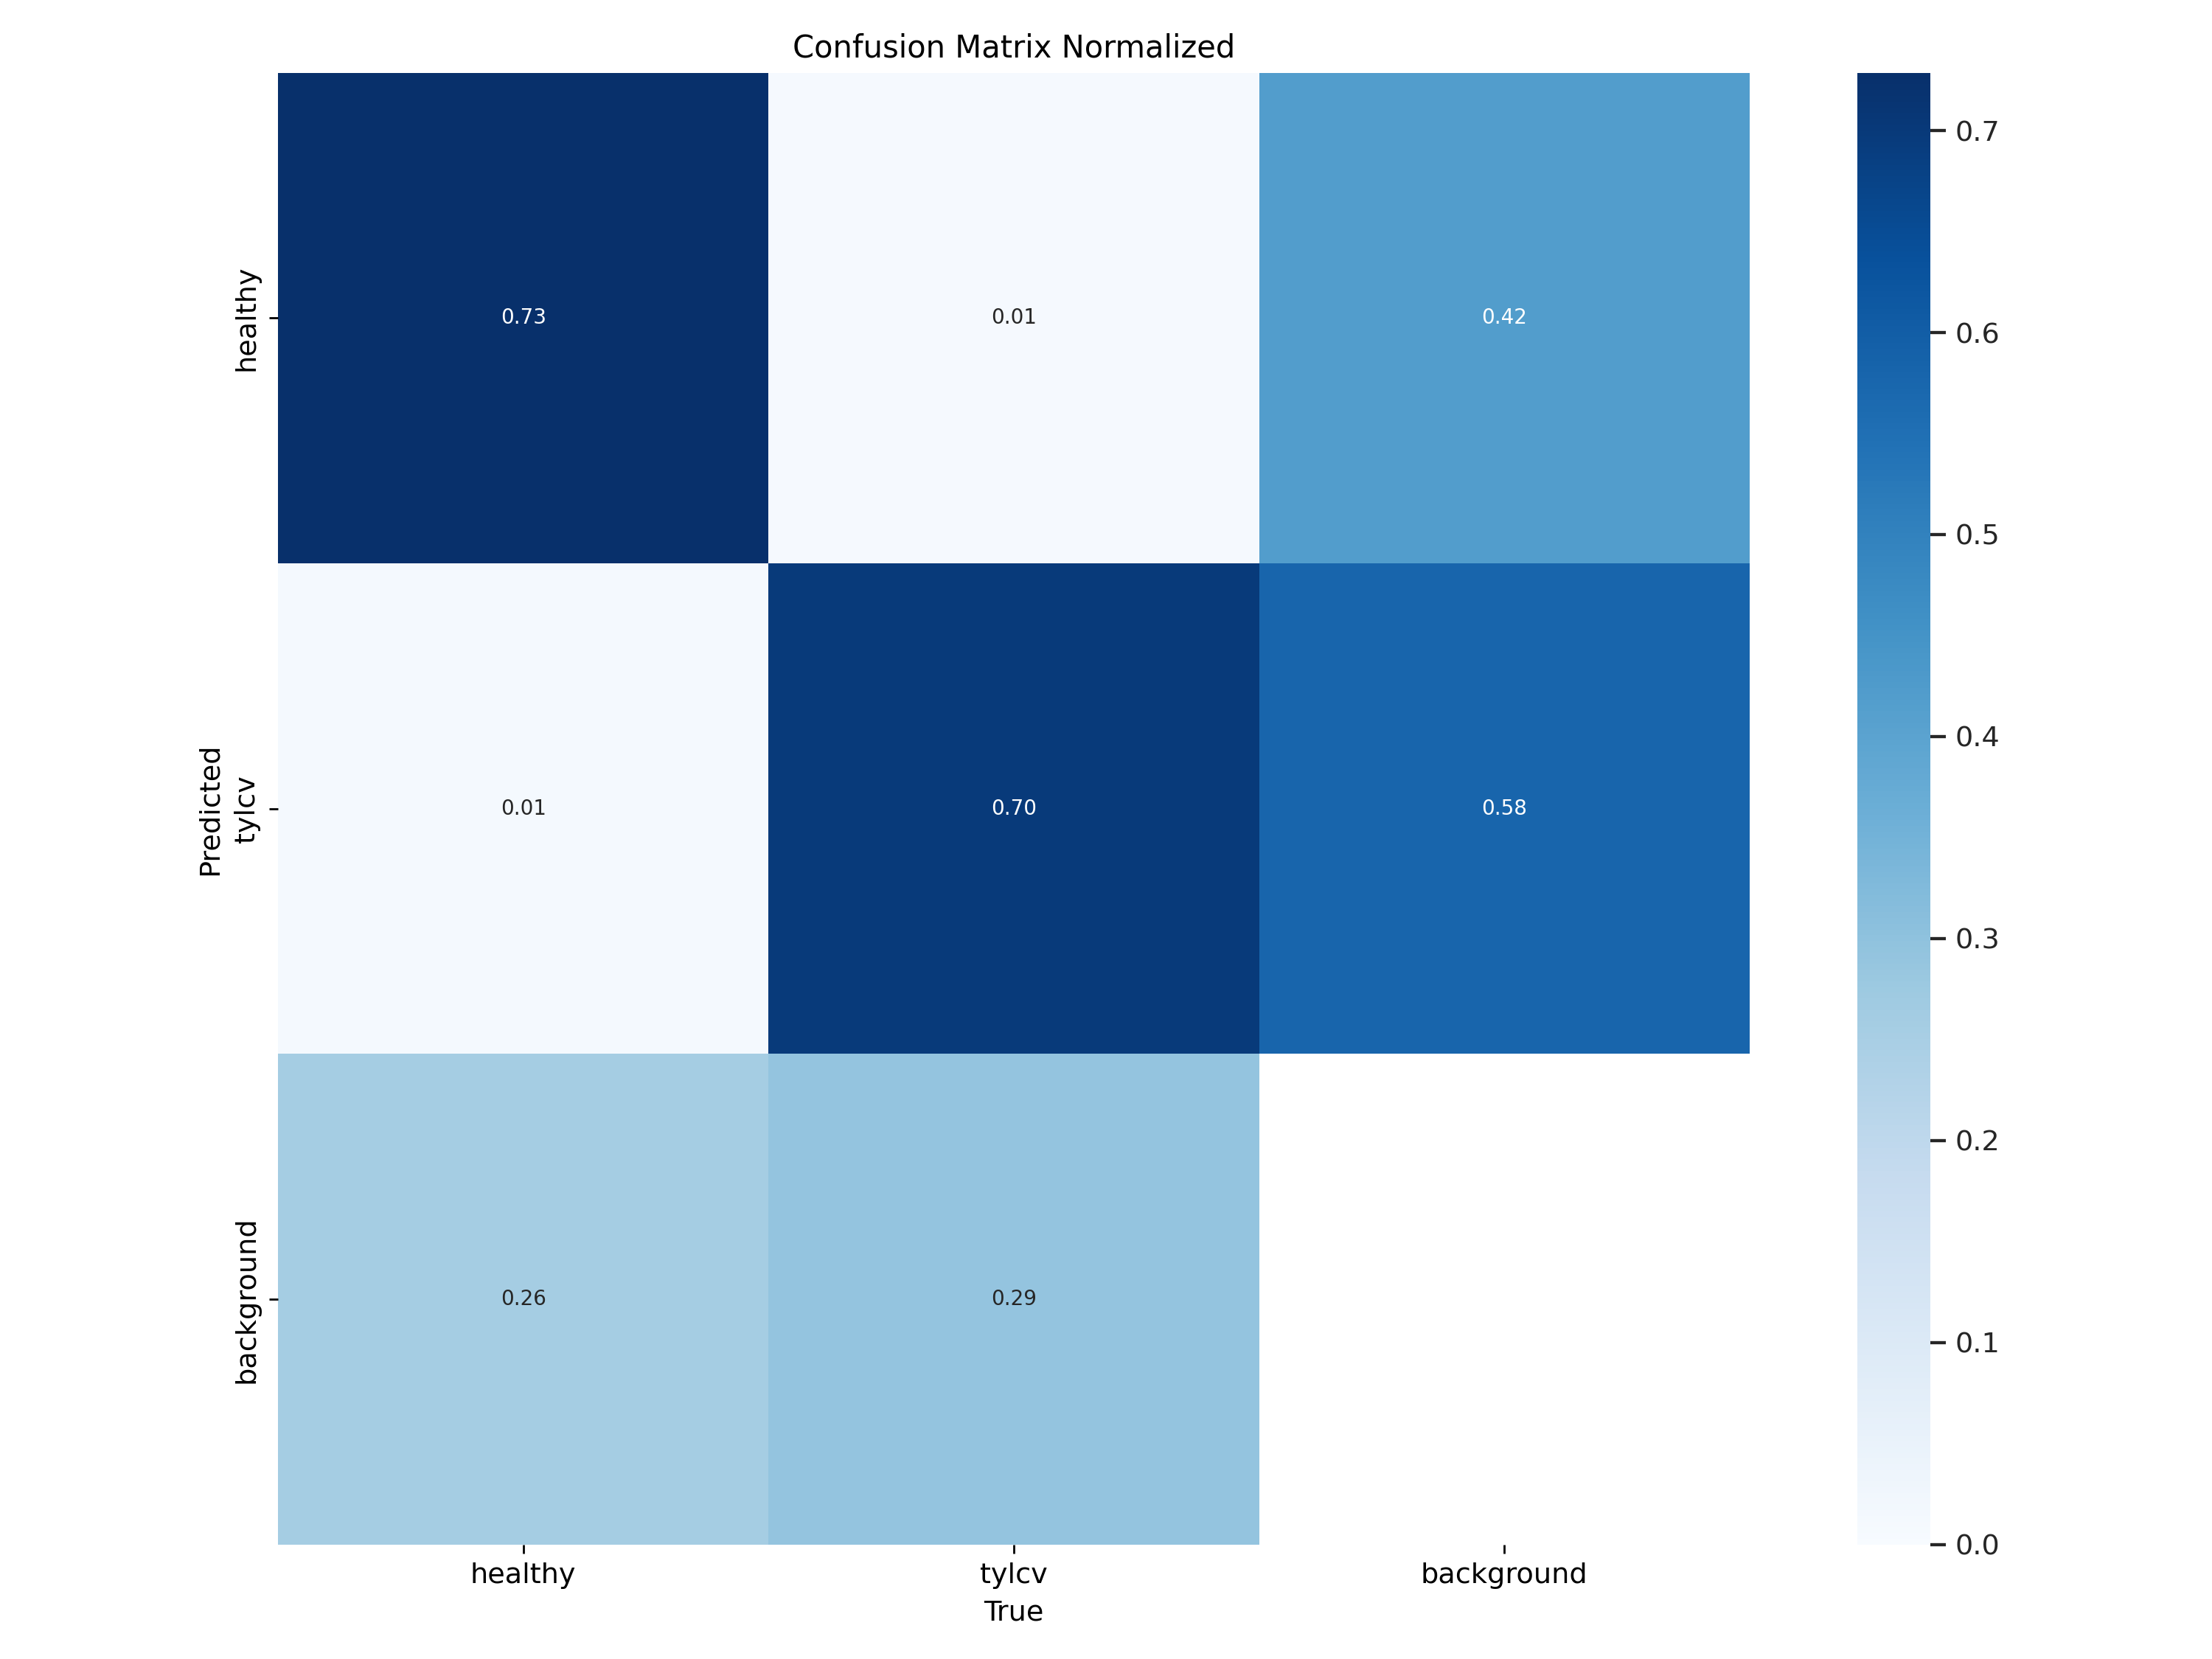

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=800)

/content


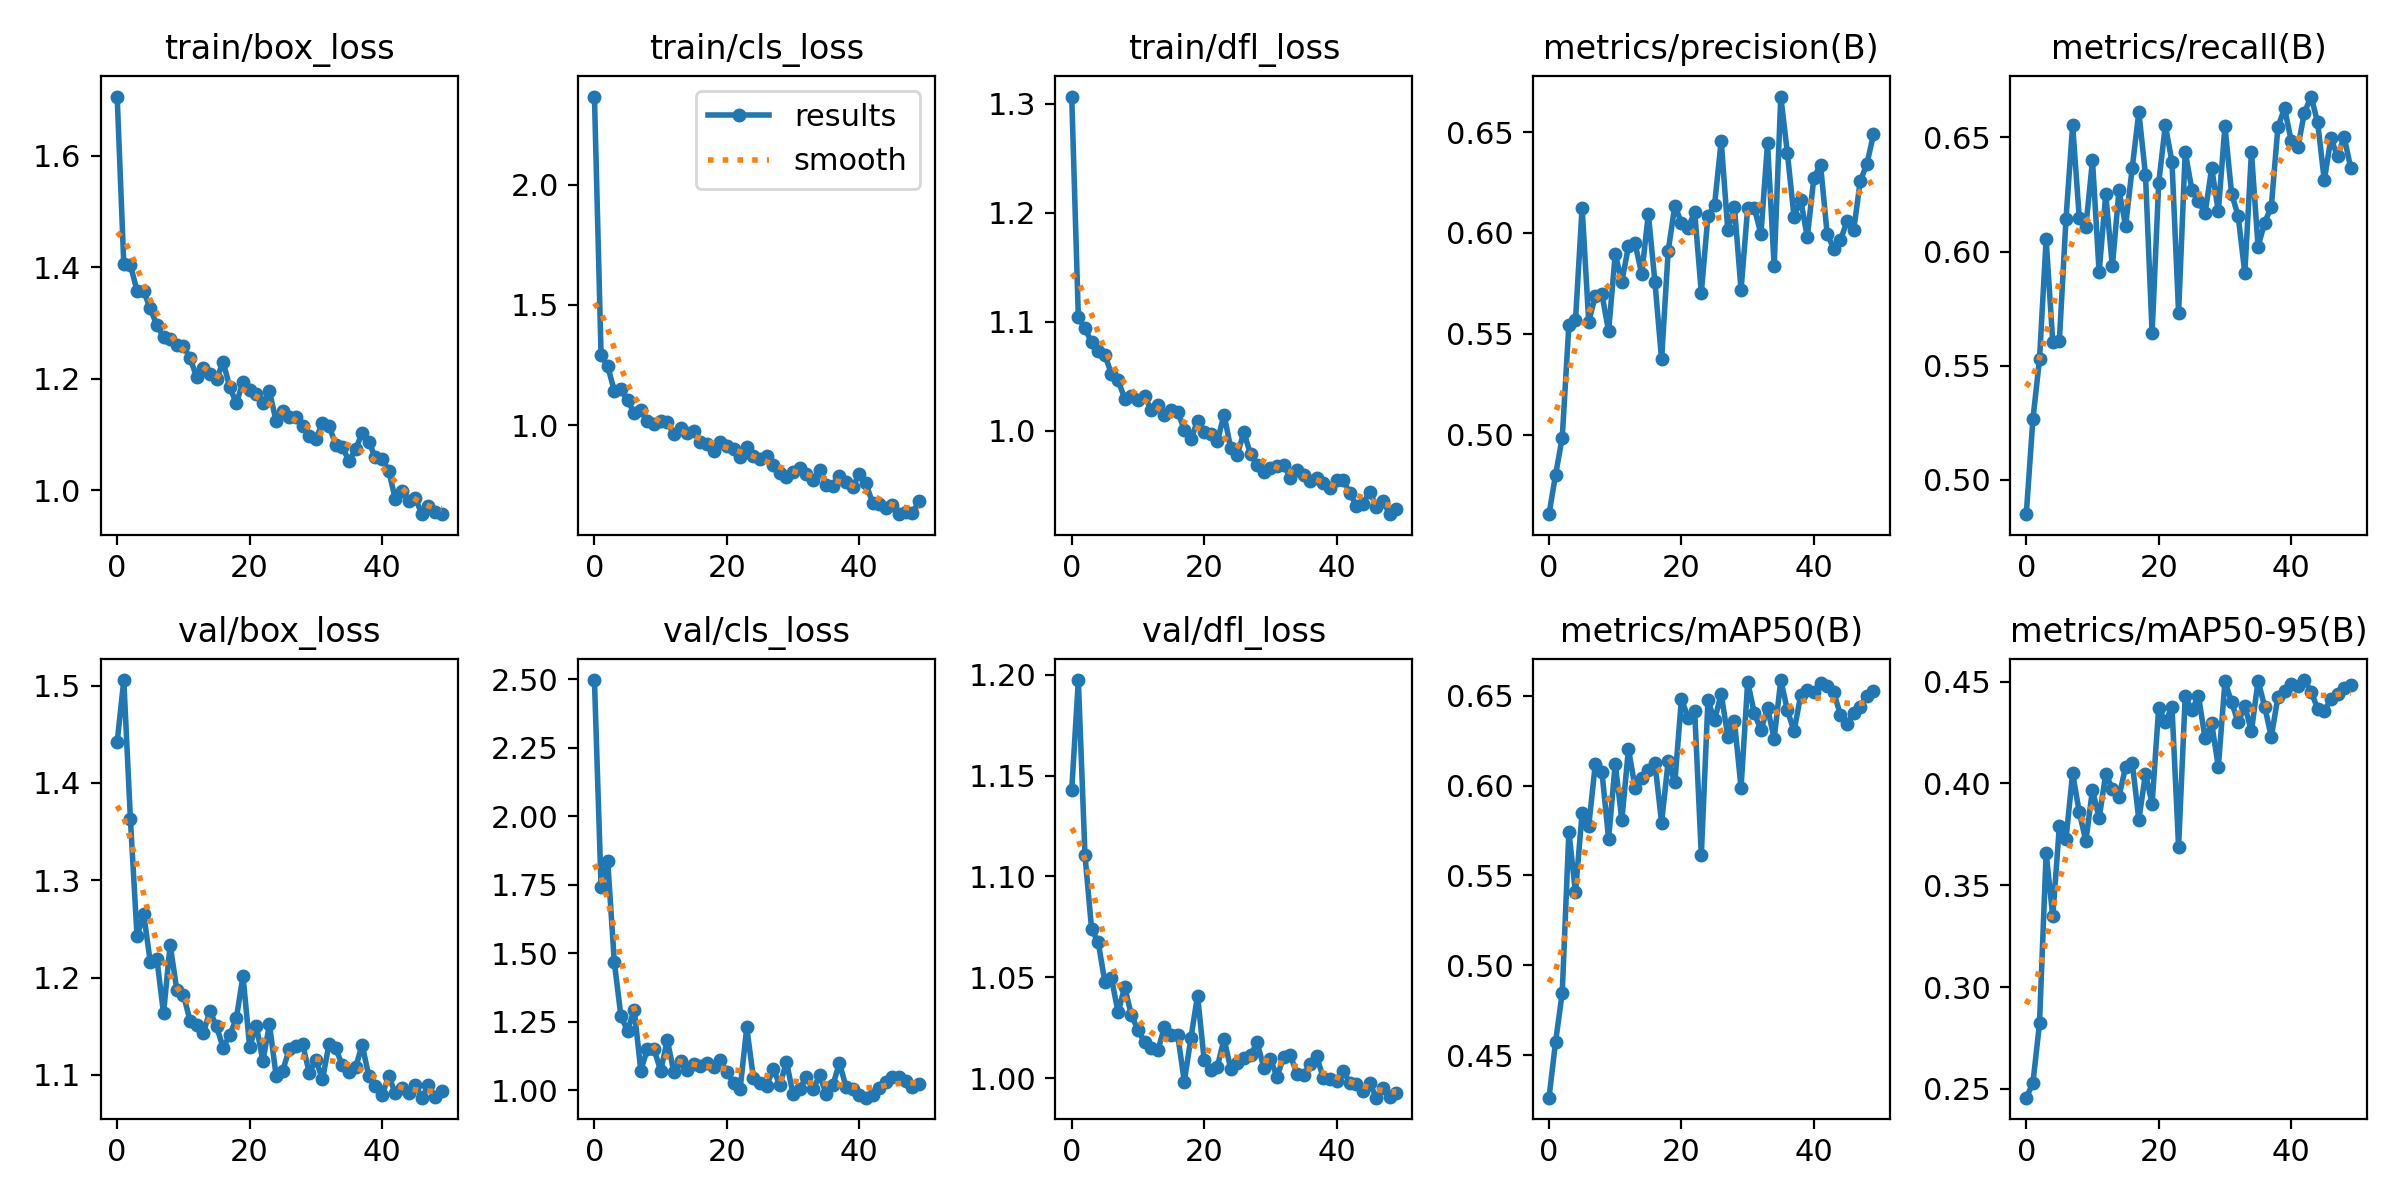

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


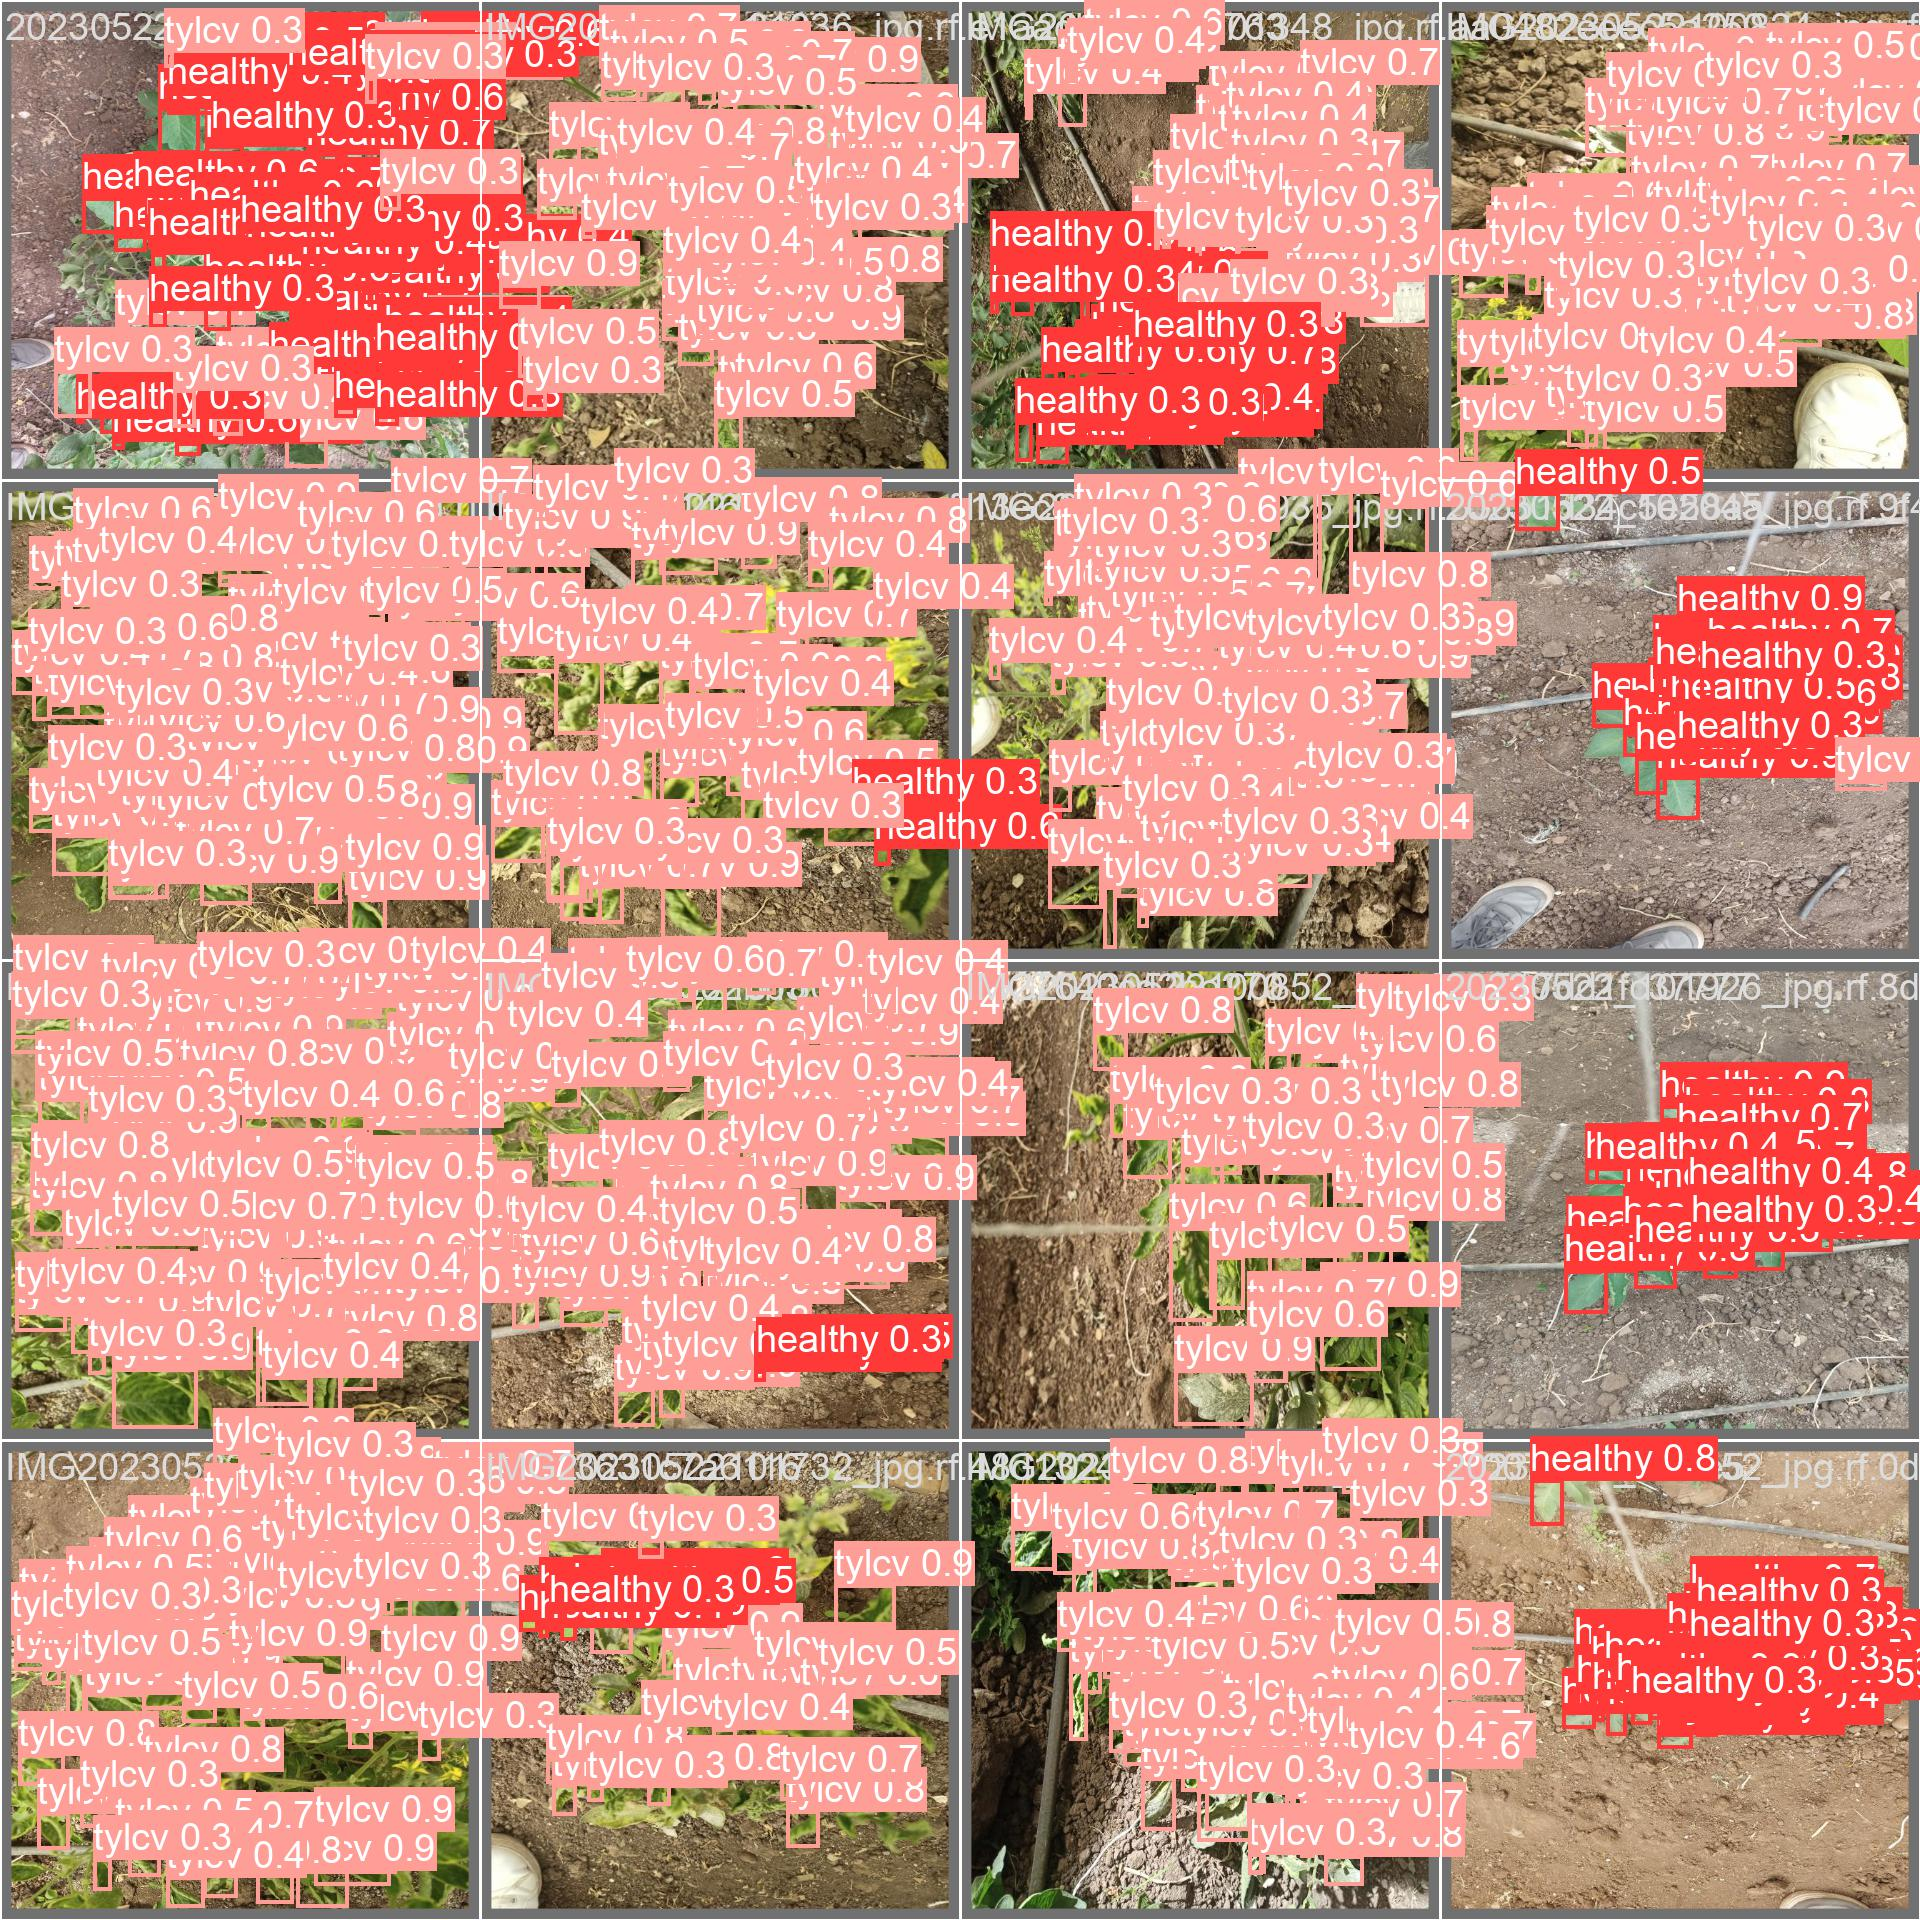

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/project-1/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100% 28/28 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.12s/it]
                   all         28       1253      0.668      0.602      0.659      0.452
               healthy         28        571        0.7      0.588      0.692      0.485
                 tylcv         28        682      0.635      0.615      0.626      0.419
Speed: 0.2ms preprocess, 17.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/10 /content/project-1/test/images/20230522_100656_jpg.rf.fd0ed3967647da515f4bd35302b1c0ee.jpg: 640x640 50 healthys, 16.4ms
image 2/10 /content/project-1/test/images/20230522_100836_jpg.rf.623287864f6c6e5cf48f962c14b52fd6.jpg: 640x640 48 healthys, 16.2ms
image 3/10 /content/project-1/test/images/20230522_101030_jpg.rf.e7cf97da10e6534bb508d310ea177385.jpg: 640x640 50 healthys, 1 tylcv, 16.3ms
image 4/10 /content/project-1/test/images/20230522_101058_jpg.rf.e0561afe26e2d0fcd3a649a2b3eb2877.jpg: 640x640 37 healthys, 1 tylcv, 16.2ms
image 5/10 /content/project-1/test/images/20230522_101658_jpg.rf.0c14d34290984906c4eca25abde99554.jpg: 640x640 22 healthys, 16.2ms
image 6/10 /content/project-1/test/images/20230522_101811_jpg.rf.540d8757737e7ba1f3c01c8b3c0bcaf8.jpg: 640x640 23 healthys, 16.2ms
image 7/10 /content/project-1/

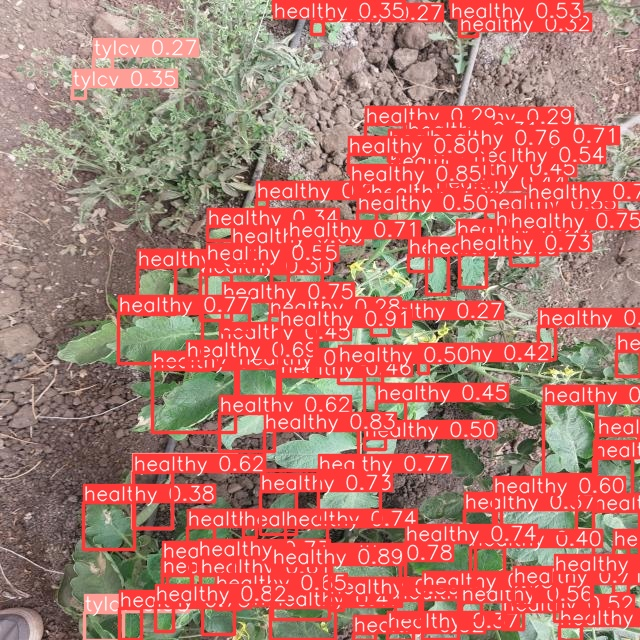

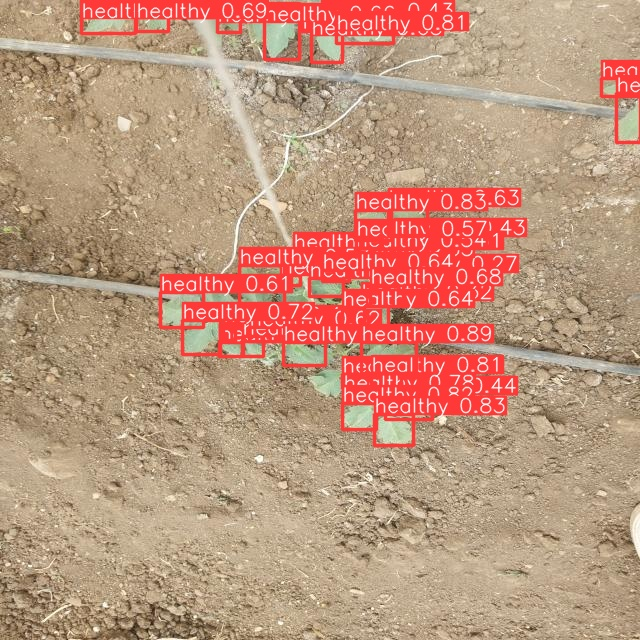

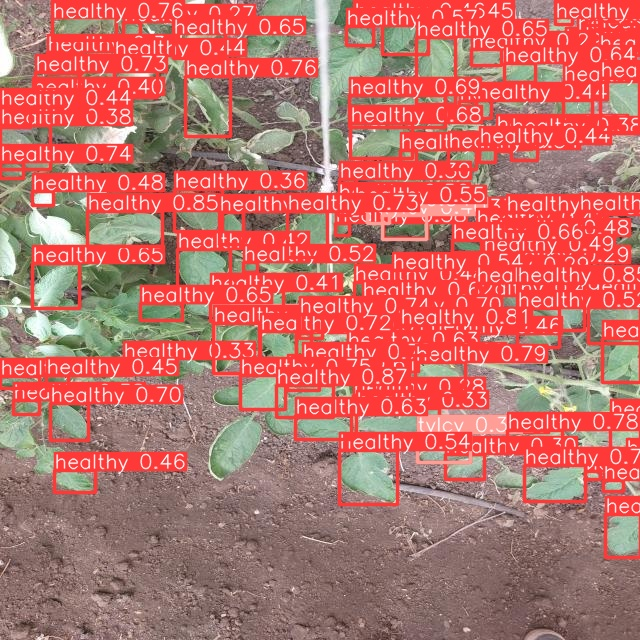

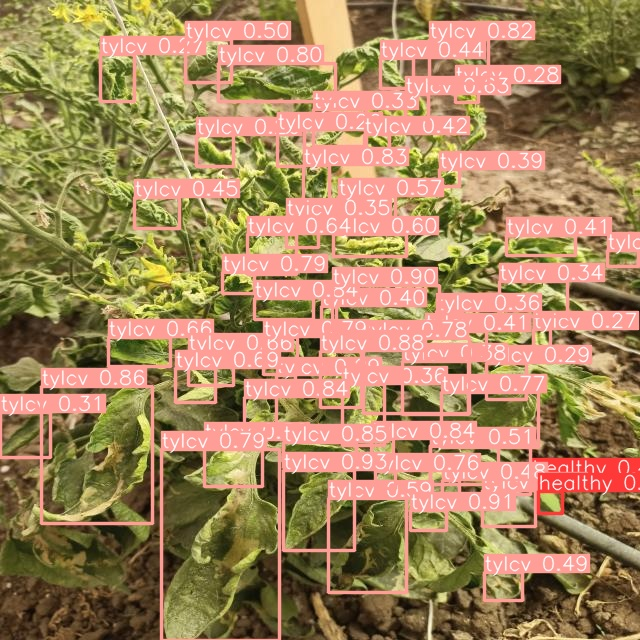

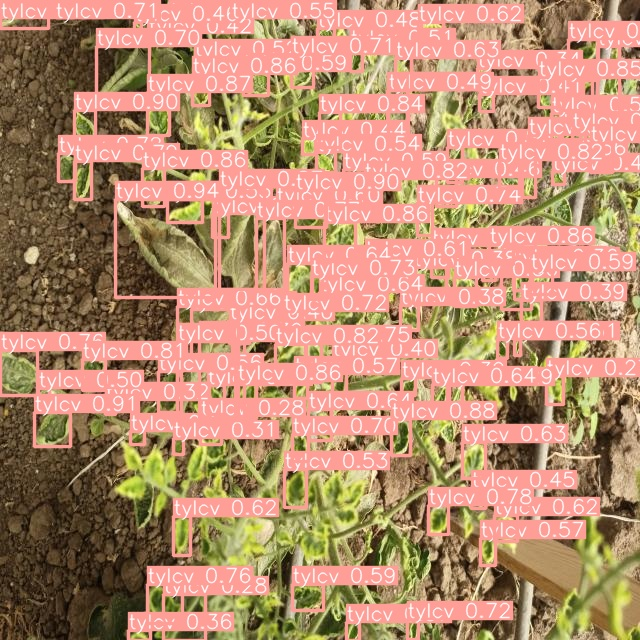

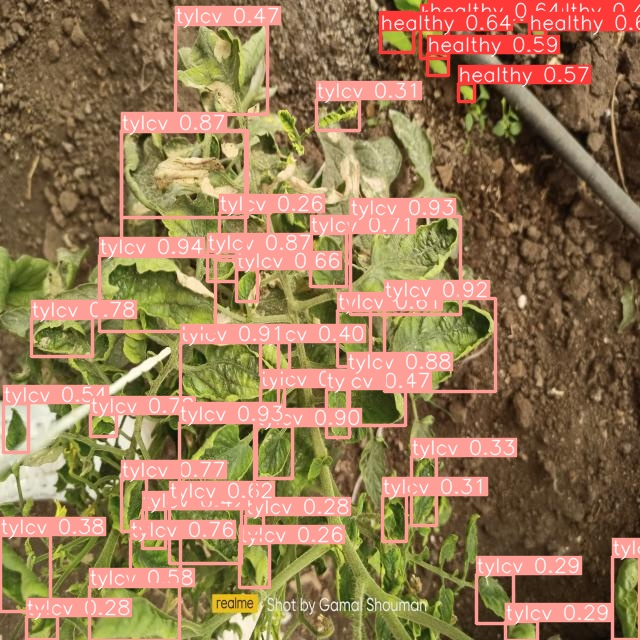

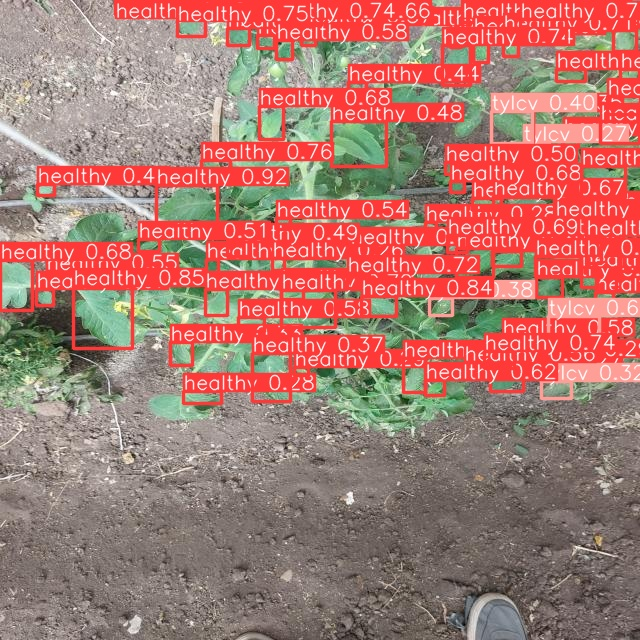

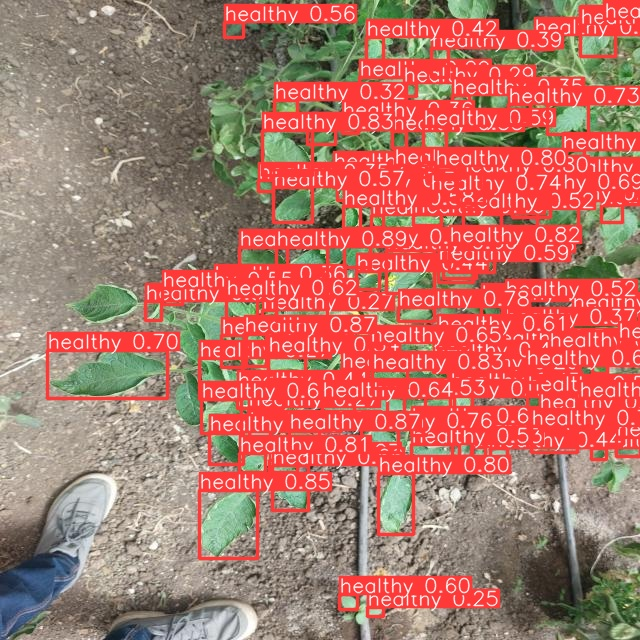

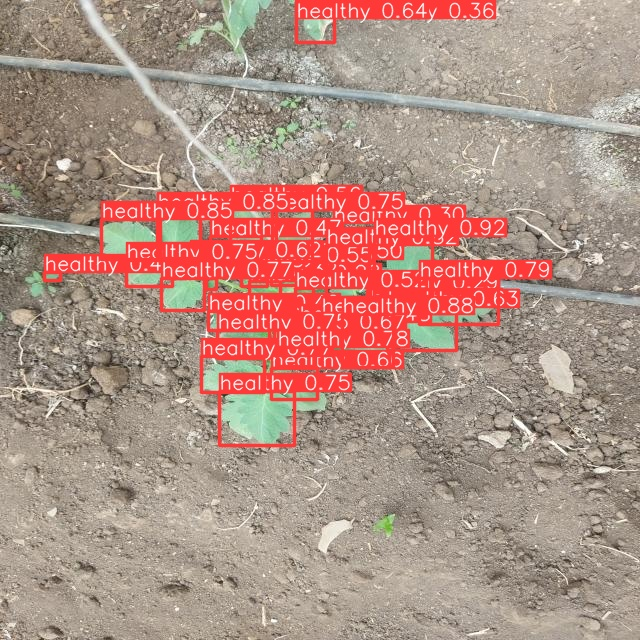

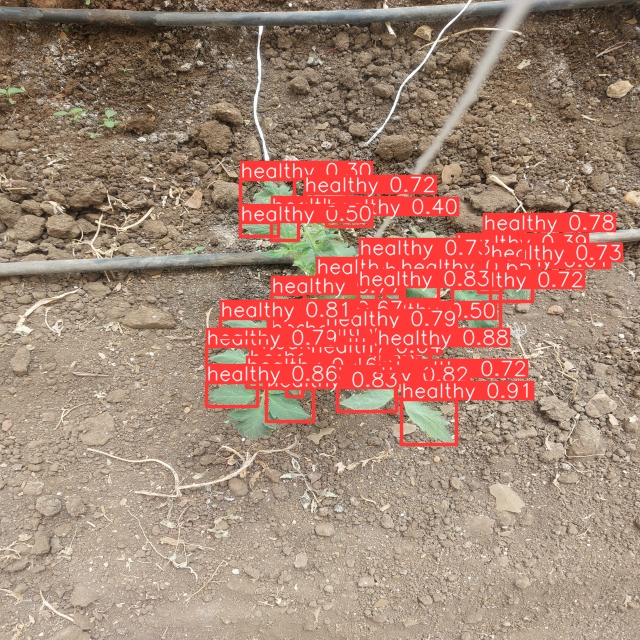

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:]:

      display(Image(filename=image_path, width=1300))
      print("\n")